<a href="https://colab.research.google.com/github/ValdazoAmerico/sklearn-matplotlib-seaborn/blob/main/data_science_on_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATAPATH = 'Advertising.csv'

data = pd.read_csv(DATAPATH, index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
def scatter_plot(feature):
  plt.figure(figsize=(10,5))
  plt.scatter(data[feature], data['sales'], c='black')
  plt.xlabel(f'Money spent on {feature} ads ($)')
  plt.ylabel('Sales (k$)')
  plt.show()

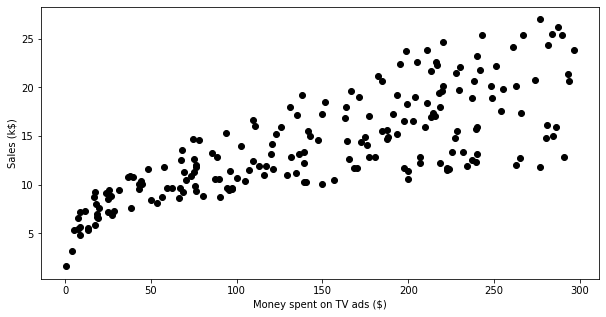

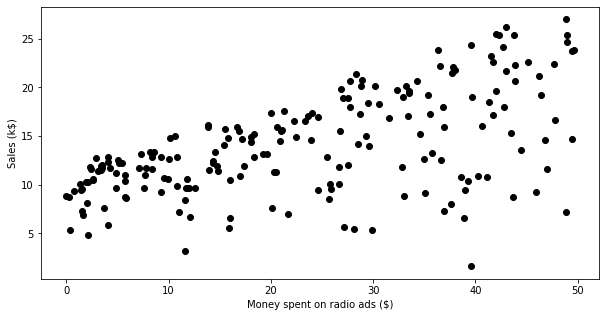

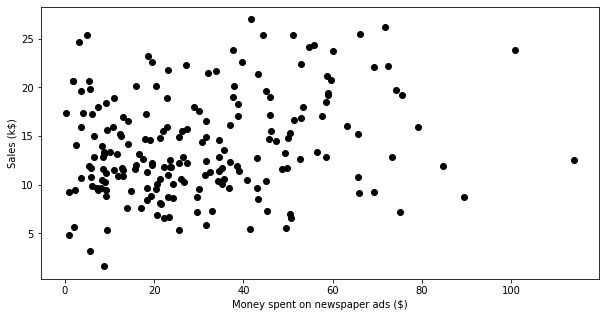

In [ ]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

In [ ]:
lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

-mean_MSE

3.0729465971002106

In [ ]:
#Regularization
#Ridge regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
ridge_regressor.best_params_

{'alpha': 20}

In [ ]:
-ridge_regressor.best_score_

3.072671338341143

In [ ]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(tol=0.05)
lasso_regresso = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

In [ ]:
lasso_regresso.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.05, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regresso.best_params_

{'alpha': 1}

In [ ]:
-lasso_regresso.best_score_

3.035998320911191

# DECISION TREES

In [3]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

In [4]:
DATAPATH = 'breastCancer.csv'
data = pd.read_csv(DATAPATH)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


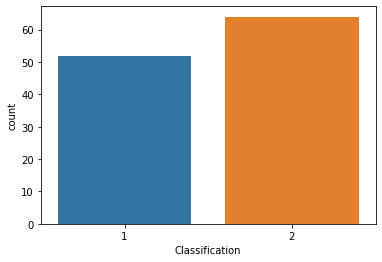

In [5]:
x = data['Classification']
ax = sns.countplot(x=x, data=data)

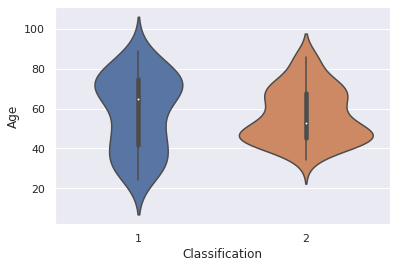

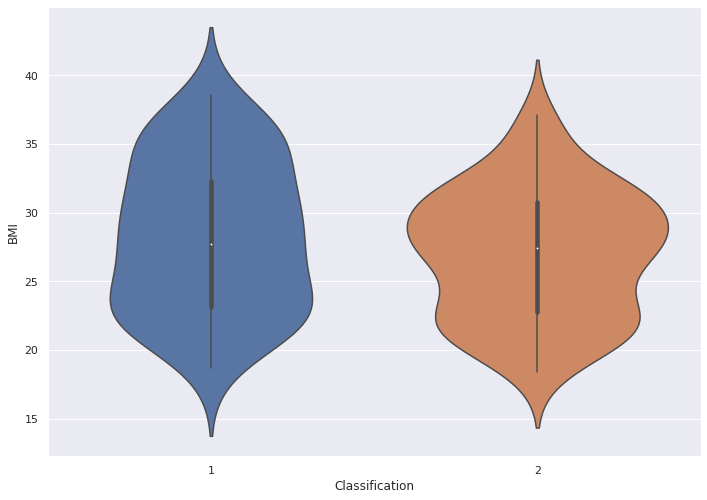

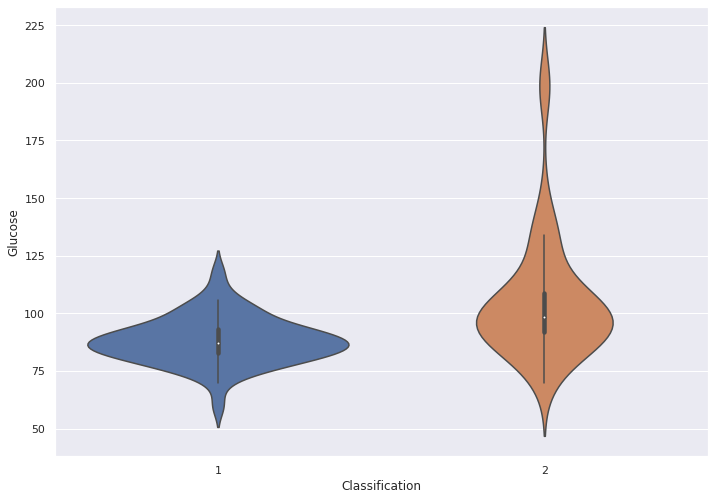

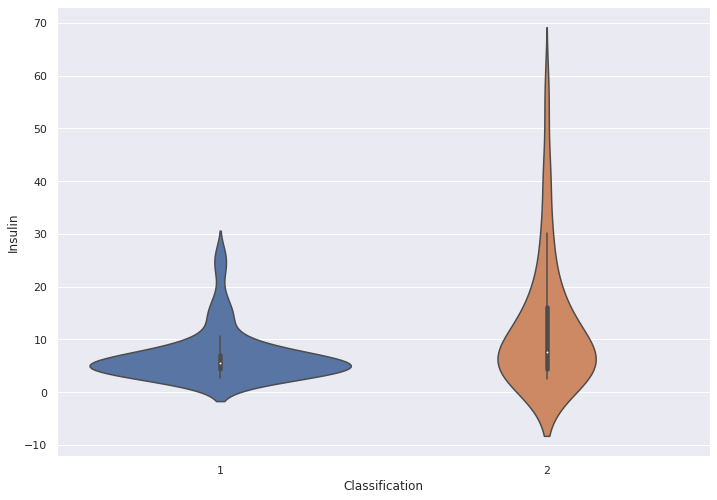

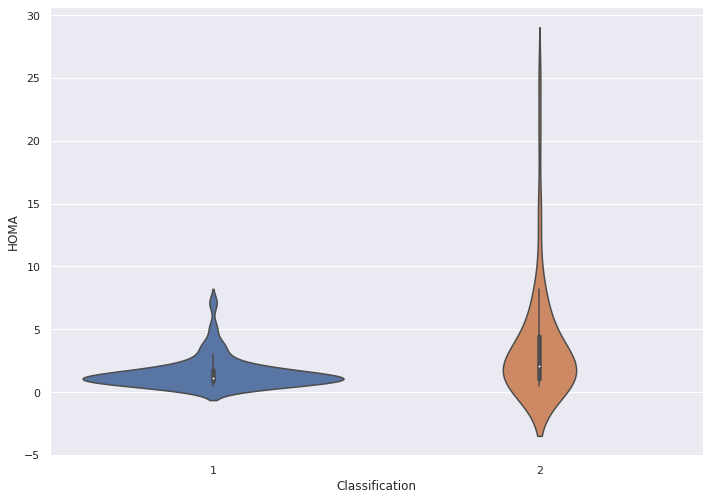

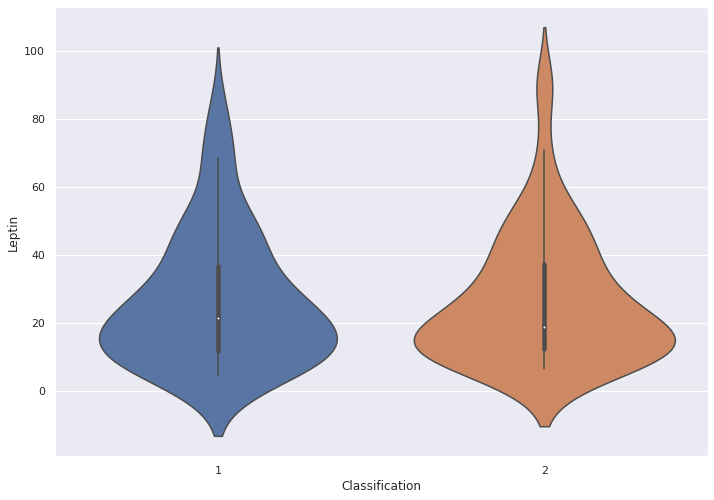

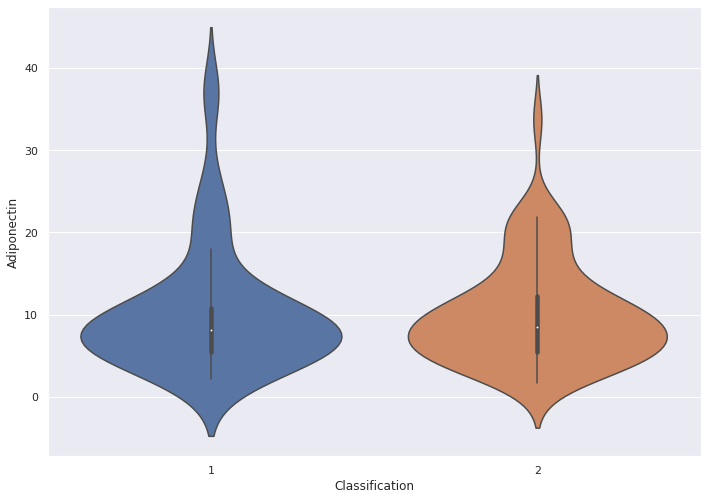

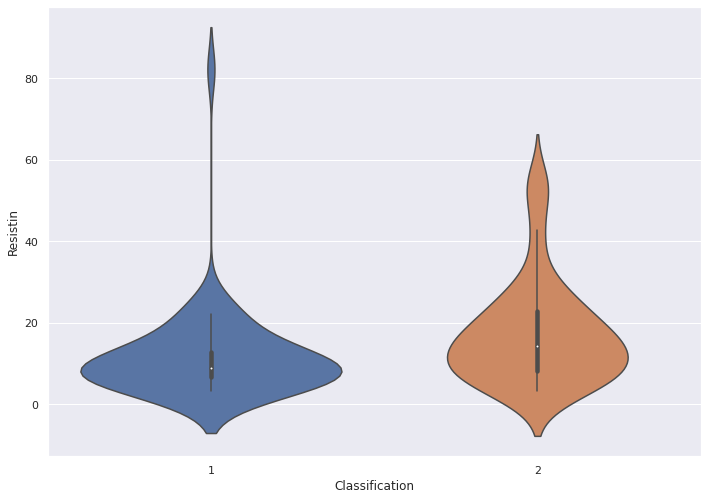

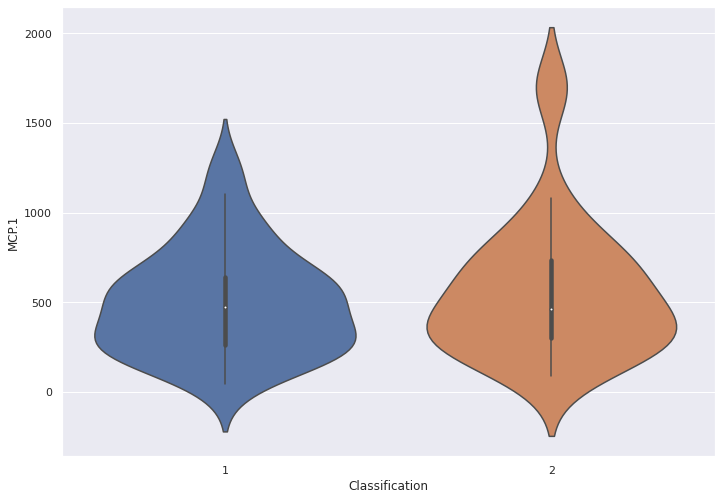

In [7]:
import matplotlib.pyplot as plt

def violin_plots(x, y, data):
  for i, col in enumerate(y):
    plt.figure(i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    ax = sns.violinplot(x=x, y=col, data=data)

y = data.columns[:-1]
x = data.columns[-1]

violin_plots(x, y, data)

In [8]:
for col in data.columns:
  print(f'{col}: {data[col].isnull().sum()}')

Age: 0
BMI: 0
Glucose: 0
Insulin: 0
HOMA: 0
Leptin: 0
Adiponectin: 0
Resistin: 0
MCP.1: 0
Classification: 0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [17]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1,1)
X = data.drop(['Classification'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

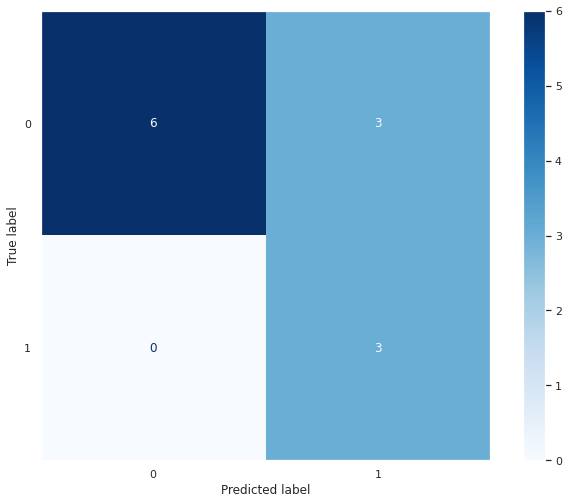

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

[Text(317.3625, 417.44597142857134, 'X[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(199.485, 353.22351428571426, 'X[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(163.215, 289.0010571428571, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(235.75500000000002, 289.0010571428571, 'X[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(145.08, 224.77859999999998, 'X[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(72.54, 160.55614285714285, 'X[0] <= 45.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(36.27, 96.3336857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(108.81, 96.3336857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(217.62, 160.55614285714285, 'X[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(181.35000000000002, 96.3336857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(253.89000000000001, 96.3336857142857, 'X[5] <= 8.747\ngini = 0.142\nsamples = 13\nva

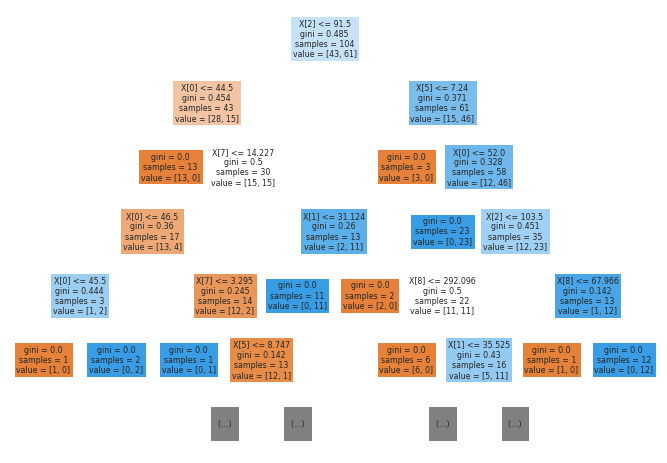

In [22]:
from sklearn.tree import plot_tree

plot_tree(clf, max_depth=5, filled=True)

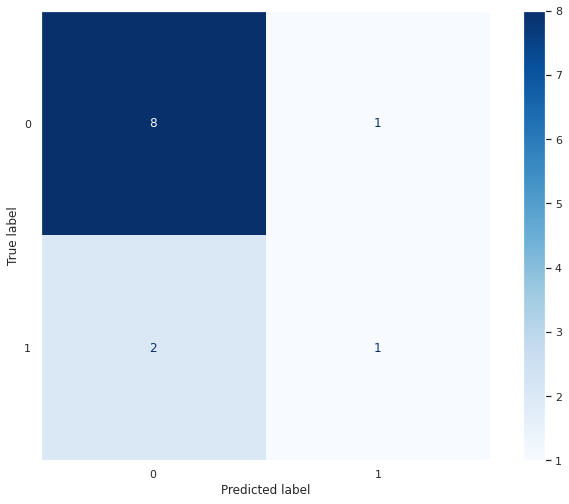

In [25]:
#Bagging
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()

bagging_clf.fit(X_train, y_train.ravel())


plot_confusion_matrix(bagging_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [24]:
y_train.ravel()

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

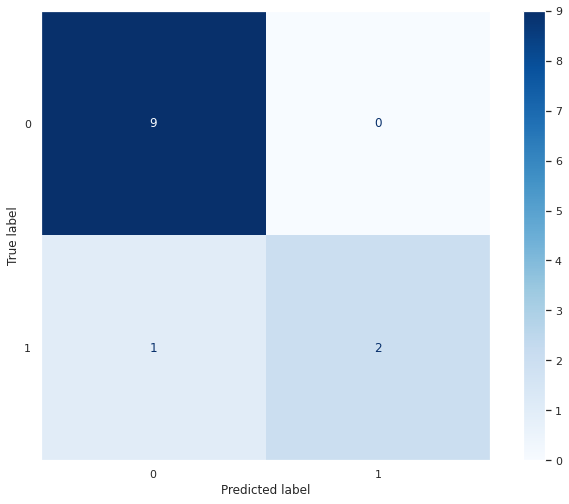

In [27]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(100)
random_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(random_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

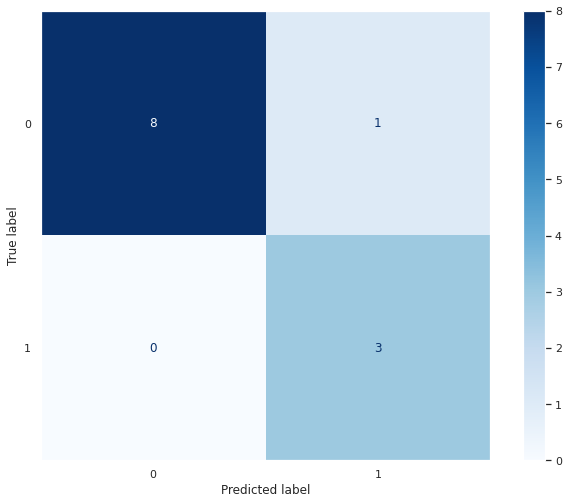

In [29]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier
boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(boost_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()